# Quiz 4: Hadoop for Fun and Profit (125 pts)

## Primary Author: Hannah Marr

## CS 119

---

## 1. Functional Programming [25 points]
Write functional functions as described below:

1. Create a function add that takes an arbitrary number of arguments, and adds them all. Also create a function sub that subtracts all the arguments but the first from the first. Also create a function ra_sub that performs right-associative subtraction
   
add(1, 2, 3) => 6

sub(5, 1, 2) => 2

ra_sub(5, 1, 2) => (5 - (1 - 2)) => 6

In [9]:
# This function takes an arbitrary number of elements and adds their sum
def add(*args):
    # The sum function adds all the elements passed in *args
    return sum(args)

In [13]:
# Calling the 'add' function
add(1, 2, 3)

6

In [15]:
# This function takes an arbitrary number of arguments and subtracts all the arguments (except the first one) from the first argument
def sub(*args):
    # Check if there are no arguments, return 0 in that case
    if not args:
        return 0
    # Take the first argument as the base value
    result = args[0]
    # Loop through the rest of the arguments and subtract them from the base value
    for num in args[1:]:
        result -= num
    # Return the final result after all subtractions
    return result

In [17]:
# Calling the sub function
sub(5, 1, 2)

2

In [19]:
# This function takes an arbitrary number of arguments and performs right-associative subtraction
def ra_sub(*args):
    # Check if there are no arguments, return 0 in that case
    if not args:
        return 0
    # If there's only one argument, just return that argument (no subtraction to perform)
    if len(args) == 1:
        return args[0]
    # Start with the last argument and perform right-associative subtraction
    result = args[-1]  # Start with the last element
    # Loop backwards from the second-to-last element to the first element
    for num in reversed(args[:-1]):
        result = num - result  # Perform the subtraction right to left
    return result

In [27]:
# Calling the ra_sub function
ra_sub(5, 1, 2)

6

2. Create a function zip that takes an arbitrary number of sequences, and zips them, i.e. creates a list of lists, where the inner lists consist of the first elements from the given sequences, then the second elements from the given sequences, and so on.

zip([1, 2, 3], [4, 5, 6]) => [[1, 4], [2, 5], [3, 6]]

zip([1, 2, 3], [4, 5, 6], [7, 8, 9]) => [[1, 4, 7], [2, 5, 8], [3, 6, 9]]

In [42]:
# This function takes an arbitrary number of sequences and zips them together. It creates a list of lists, where each inner list contains the elements at the same index from the input sequences
def zip_custom(*sequences):
    # Find the length of the shortest sequence
    min_length = min(len(seq) for seq in sequences)
    # Create a list of lists, where each inner list contains elements at the same index from all sequences
    result = []
    for i in range(min_length):
        # Collect the i-th element from each sequence
        zipped_elements = [seq[i] for seq in sequences]
        # Add this list of i-th elements to the result
        result.append(zipped_elements)
    # Return the final result list
    return result

In [37]:
# Calling the zip_custom function (not using Python's built-in zip function)
zip_custom([1, 2, 3], [4, 5, 6])

[[1, 4], [2, 5], [3, 6]]

In [39]:
# Another example of calling the zip_custom function (not using Python's built-in zip function)
zip_custom([1, 2, 3], [4, 5, 6], [7, 8, 9])

[[1, 4, 7], [2, 5, 8], [3, 6, 9]]

3. Create a function zipwith that takes a function f and an arbitrary number of sequences, and returns a list of f applied to the first elements of the given sequences, followed by f applied to the second elements of the sequences, and so on.

zipwith(add, [1, 2, 3], [4, 5, 6]) => [5, 7, 9]

zipwith(add, [1, 2, 3], [4, 5, 6], [1, 1, 1]) => [6, 8, 10]

In [44]:
# This function takes a function f and an arbitrary number of sequences, and applies f to the corresponding elements of the sequences
def zipwith(f, *sequences):
    # Find the length of the shortest sequence
    min_length = min(len(seq) for seq in sequences)
    # Initialize an empty result list
    result = []
    # Loop over the range of the minimum sequence length
    for i in range(min_length):
        # Gather the ith elements from each sequence
        elements = [seq[i] for seq in sequences]
        # Apply the function f to the gathered elements
        result.append(f(*elements))
    # Return the final result list
    return result

In [46]:
# Calling the zipwith function
zipwith(add, [1, 2, 3], [4, 5, 6])

[5, 7, 9]

In [48]:
# Another example of calling the zipwith function
zipwith(add, [1, 2, 3], [4, 5, 6], [1, 1, 1])

[6, 8, 10]

4. Create a function flatten that can flatten a tree.

flatten([1, [2, [3, 4], [5, 6], 7], 8, [9, 10]]) 
    => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [52]:
# This function takes a nested list (tree structure) and recursively flattens it into a single list with no nested lists
def flatten(tree):
    # Initialize an empty list to hold the flattened elements
    result = []
    # Iterate over each element in the tree
    for element in tree:
        # If the element is a list, recursively flatten it and extend the result list
        if isinstance(element, list):
            result.extend(flatten(element))
        else:
            # If it's not a list, simply append it to the result list
            result.append(element)
    # Return the fully flattened list
    return result

In [54]:
# Calling the flatten function
flatten([1, [2, [3, 4], [5, 6], 7], 8, [9, 10]])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

5. Create a function group_by that takes a function and a sequence and groups the elements of the sequence based on the result of the given function. In the example below, len returns the length of a sequence.

group_by(len, ["hi", "dog", "me", "bad", "good"])
     => {2: ["hi", "me"], 3: ["dog", "bad"], 4: ["good"]}

In [57]:
# This function groups the elements of the sequence based on the result of applying the function f to each element
def group_by(f, sequence):
    # Initialize an empty dictionary to hold the groups
    result = {}
    # Iterate over each element in the sequence
    for item in sequence:
        # Apply the function f to the item to get the key
        key = f(item)
        # Add the item to the appropriate group in the dictionary
        if key not in result:
            result[key] = []  # Create a new list if the key doesn't exist
        result[key].append(item)  # Append the item to the group
    # Return the dictionary with grouped elements
    return result

In [59]:
# Calling the group_by function
group_by(len, ["hi", "dog", "me", "bad", "good"])

{2: ['hi', 'me'], 3: ['dog', 'bad'], 4: ['good']}

---

## 2. Confirming Hadoop Installation [15 points]

1. [3 points] Acquire the cluster.

# Look for log that's created somewhere in Cloud
Proof of cluster acquisition:
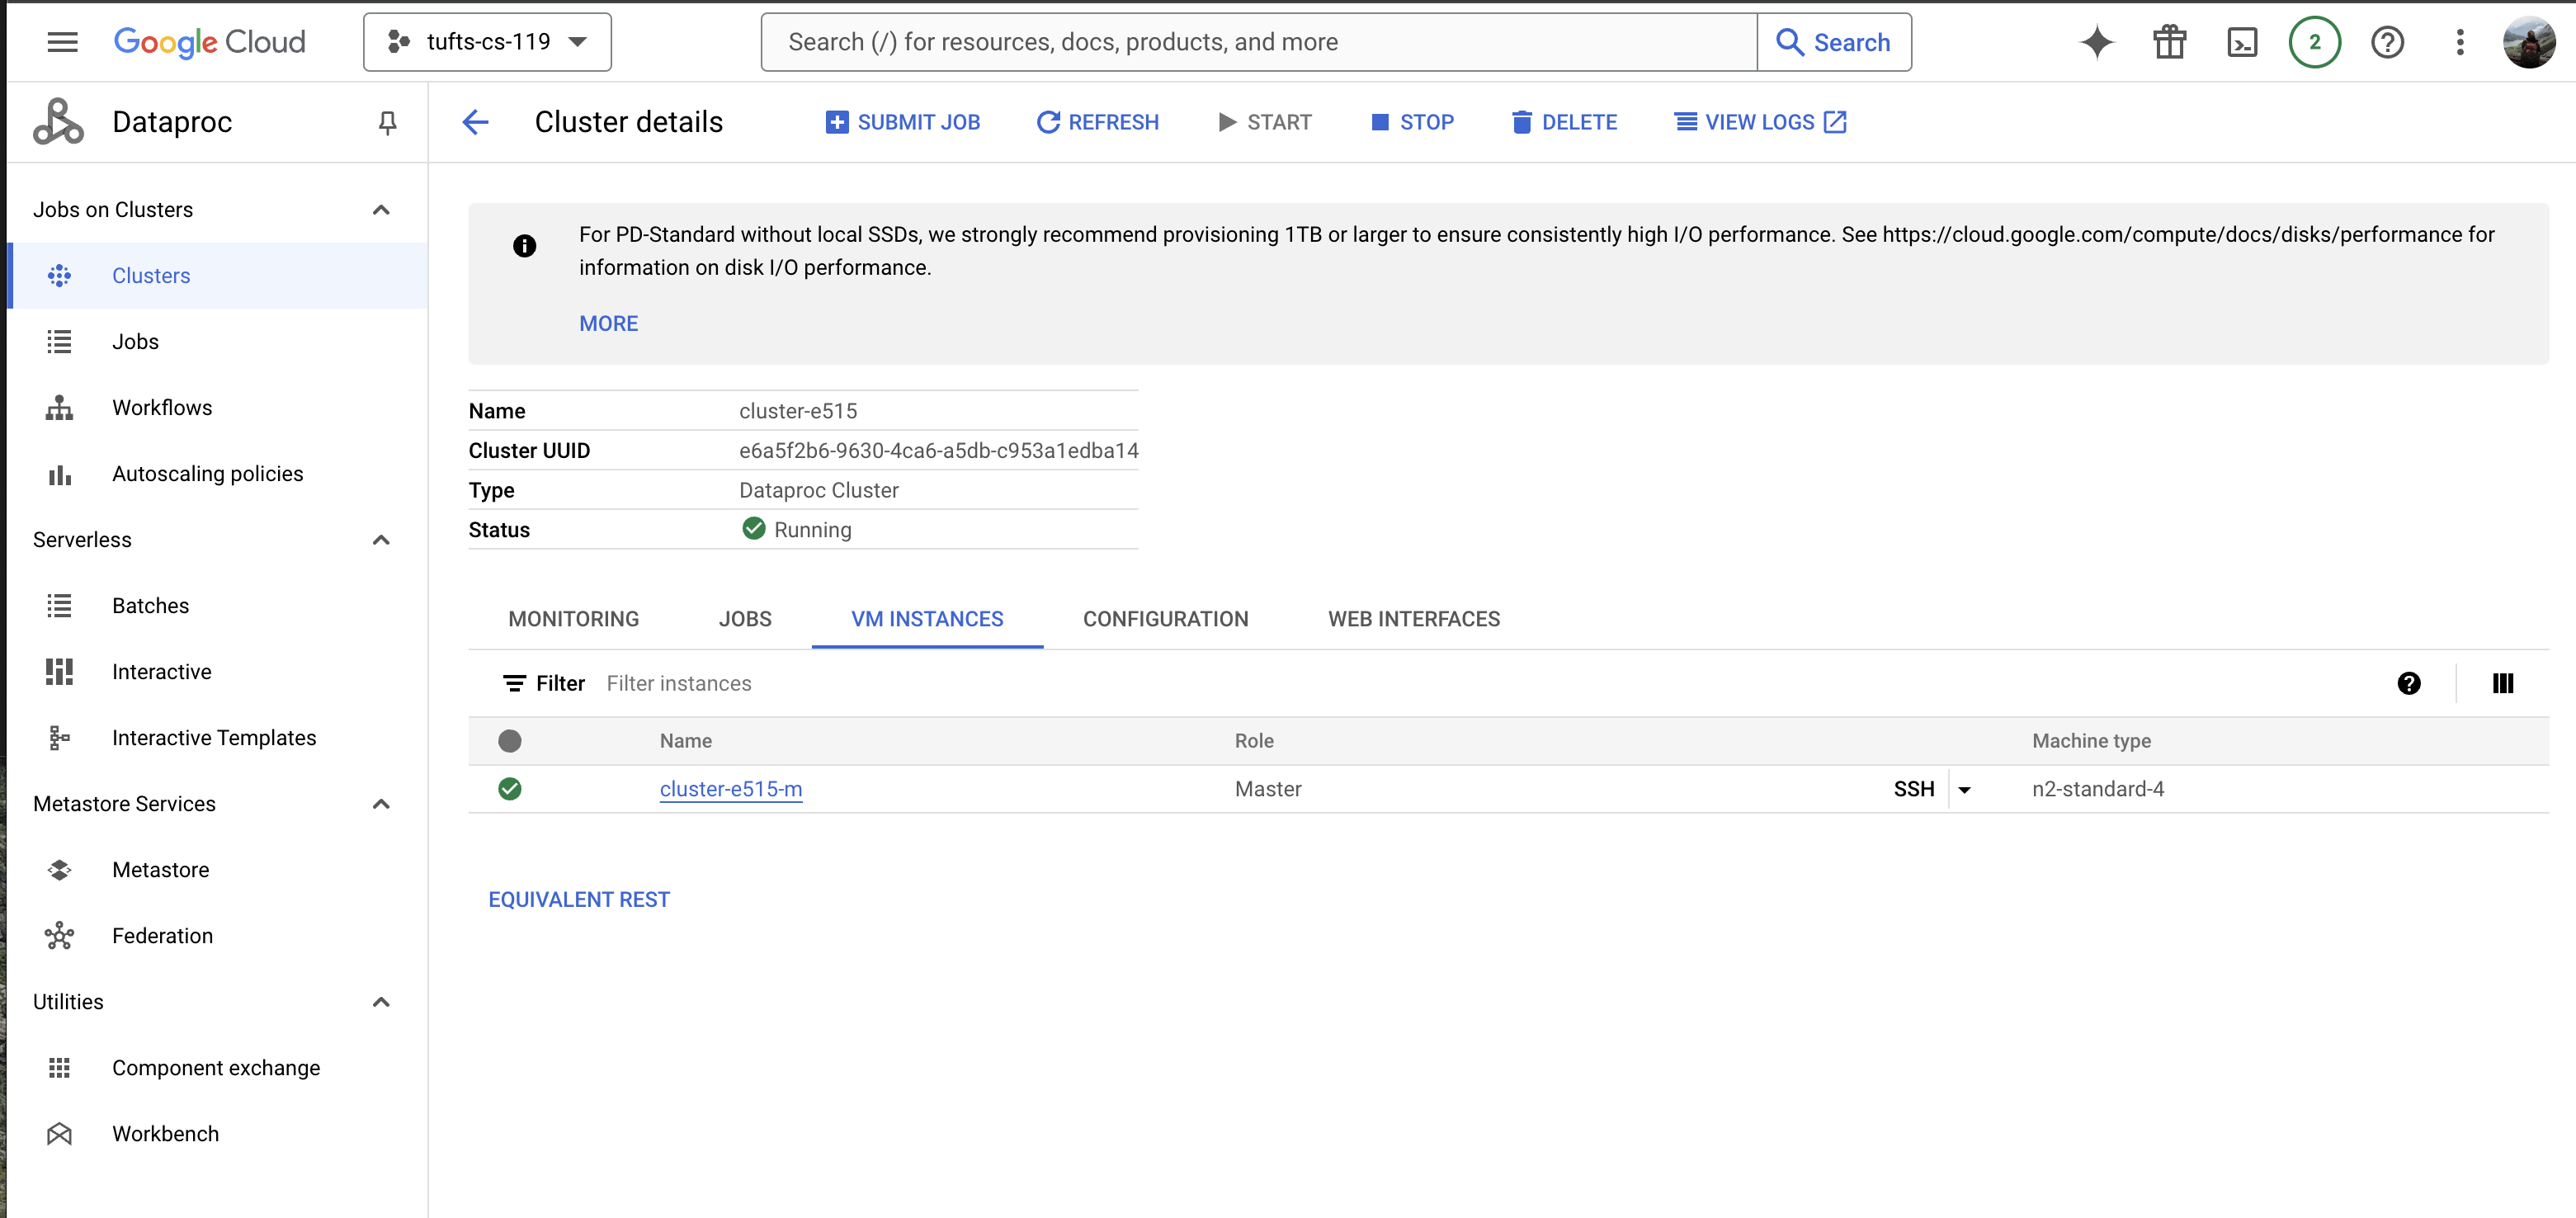

2. [3 points] Load the data into the master, move the data into HDFS.

3. [3 points] Without writing any code of your own, verify that you have a good installation of hadoop by running wordcount on five-books. The command is similar to 

hadoop jar /usr/lib/hadoop-mapreduce/hadoop-mapreduce-examples.jar wordcount /user/singhj/five-books /books-count

4. [3 points] Run wordcount using the provided mapper_noll.py and the default reducer aggregate. The command is similar to

mapred streaming -file ~/big-data-repo/hadoop/mapper_noll.py -mapper mapper_noll.py \
                 -input /user/singhj/five-books -reducer aggregate \
                 -output /books-stream-count

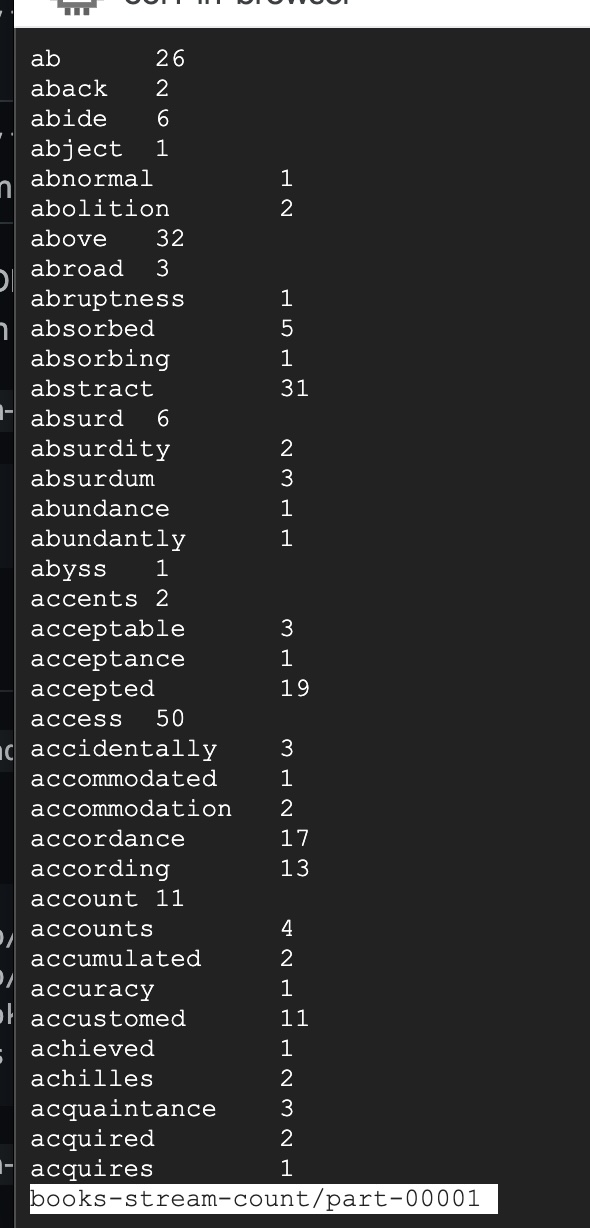

5. [3 points] Run wordcount using the provided mapper_noll.py and the provided reducer reducer_noll.py. The command is similar to
    
mapred streaming -files ~/big-data-repo/hadoop/mapper_noll.py ~/big-data-repo/hadoop/reducer_noll.py \

-mapper mapper_noll.py   \

-reducer reducer_noll.py \

-input /user/singhj/five-books \

-output /books-my-own-counts

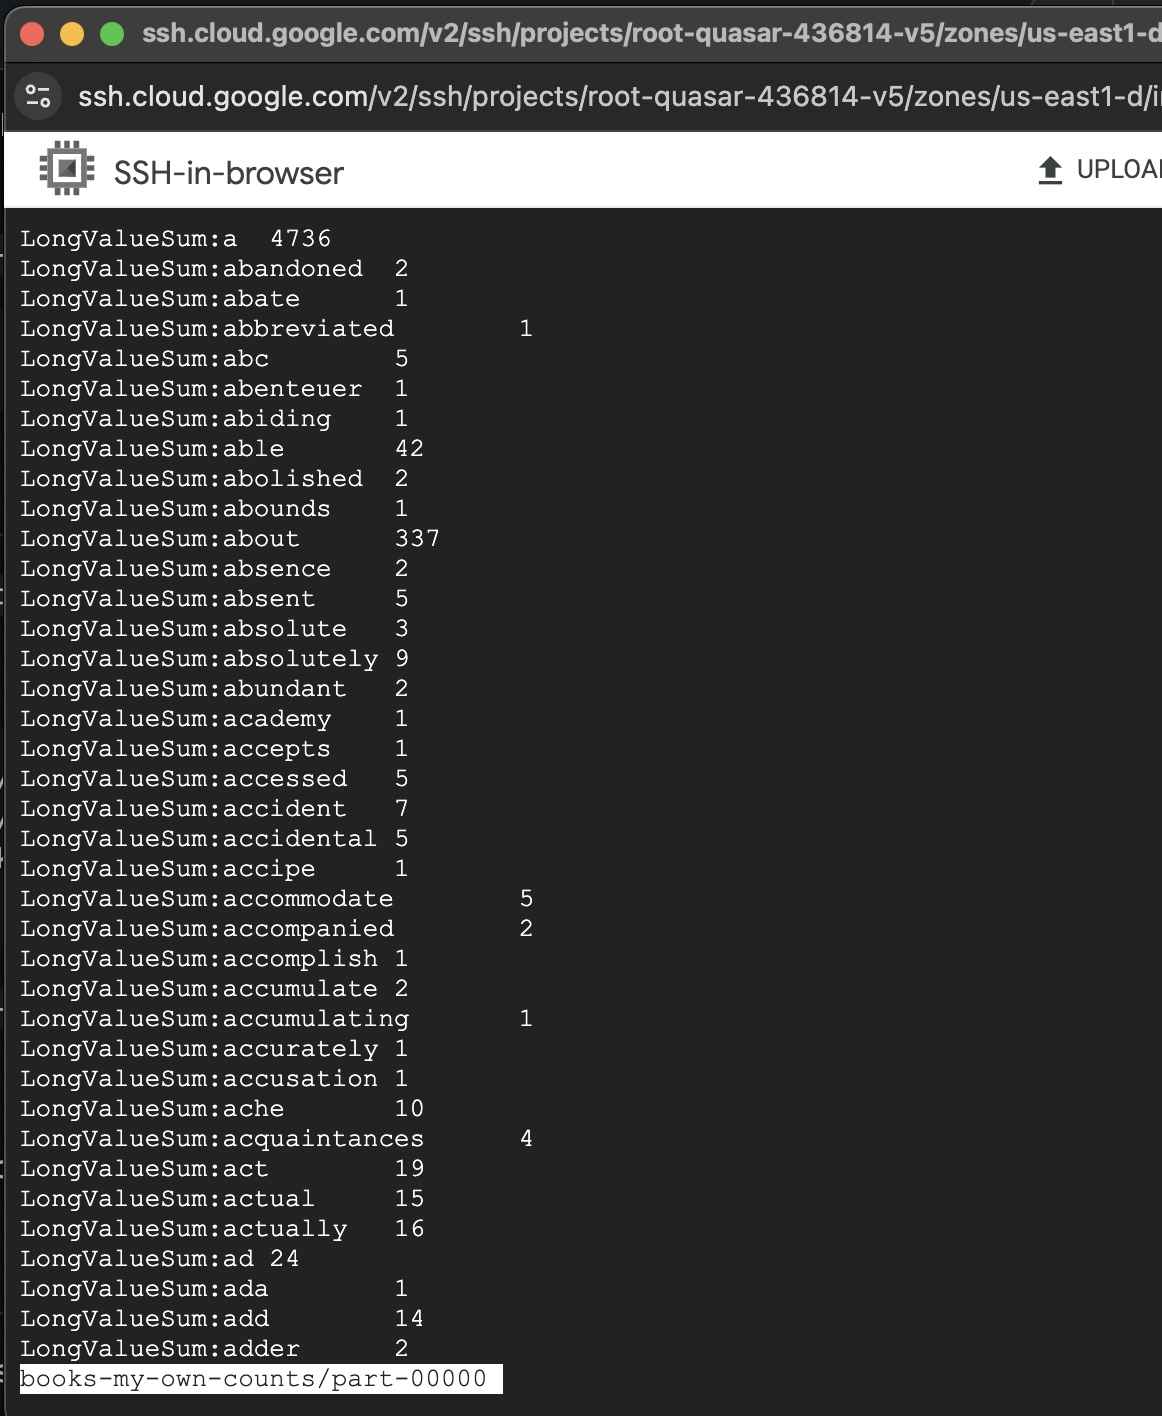

---

### 3. Analyzing Server Logs [55 points]

A dataset representing Apache web server logs is available as access.log. Each row has the following schema:

IP of client: This refers to the IP address of the client that sent the request to the server.

Remote Log Name: Remote name of the User performing the request. In the majority of the applications, this is confidential information and is hidden or not available.

User ID: The ID of the user performing the request. In the majority of the applications, this is a piece of confidential information and is hidden or not available.

Date and Time: The date and time of the request are represented in UTC format as follows: - Day/Month/Year:Hour:Minutes: Seconds +Time-Zone-Correction.

Request Type: The type of request (GET, PUT, POST, etc.) that the server got. This depends on the operation that the request will do.

API: The API of the website to which the request is related. Example: When a user accesses a cart on a shopping website, the API comes as /usr/cart.

Protocol and Version: Protocol used for connecting with server and its version.

Status Code: Status code that the server returned for the request. Eg: 404 is sent when a requested resource is not found. 200 is sent when the request was successfully served. See the http status code registry listing for interpretations of status codes.

Byte: The amount of data in bytes that was sent back to the client.

Referrer: The websites/source from where the user was directed to the current website. If none, it is represented by “-“.

User Agent String: The user agent string contains details of the browser and the host device (like the name, version, device type etc.).

Response Time: The response time the server took to serve the request. This is the difference between the timestamps when the request was received and when the request was served.

Use Hadoop to perform analytics on the provided data. The general approach might be

1. [6+9=15 points] What is the percentage of each request type (GET, PUT, POST, etc.)?

In [306]:
# This code was constitutes my mapper, and was imported into Hadoop as mapper9.py
#!/usr/bin/env python3
import sys

# Mapper function to extract the request type (GET, POST, etc.)
def mapper():
    for line in sys.stdin:
        parts = line.split()
        
        # Check if line is split as expected
        if len(parts) < 6:
            continue  # Skip lines that don't match the expected format
        
        try:
            # Extract the request method, which should be the 6th element (index 5)
            request_part = parts[5].strip('"')  # Remove surrounding quotes
            if request_part in ['GET', 'POST', 'PUT', 'DELETE', 'OPTIONS', 'HEAD']:
                print('%s\t%s' % (request_part, 1))
        except IndexError:
            # Debugging: Print a warning if the expected format is not found
            print(f"Warning: Malformed line: {line}", file=sys.stderr)

if __name__ == "__main__":
    mapper()

In [161]:
# This code constitutes my reducer, and was imported into Hadoop as reducer2.py
#!/usr/bin/env python3
import sys

current_request = None
current_count = 0
total_count = 0
request_counts = {}

# Reducer function to count occurrences of each request type
def reducer():
    global current_request, current_count, total_count

    for line in sys.stdin:
        try:
            request, count = line.strip().split('\t')
            count = int(count)
        except ValueError:
            continue  # Ignore lines that can't be processed
        
        total_count += count  # Update total number of requests

        if current_request == request:
            current_count += count
        else:
            if current_request:
                # Store the completed request type's count
                request_counts[current_request] = current_count
            current_request = request
            current_count = count

    # Don't forget to save the last request type
    if current_request:
        request_counts[current_request] = current_count

    # Output the percentage of each request type
    for request, count in request_counts.items():
        percentage = (count / total_count) * 100
        print(f"{request}\t{percentage:.2f}%")

if __name__ == "__main__":
    reducer()

The percentage of each request types are 42.84% GET, 57.16% POST, and 100.00% HEAD, which makes sense since we can expect all requests to show a HEAD type in the metadata.

2. [6+9=15 points] What percent of the responses fall into each of the following five types?
   
Informational responses (100–199)

Successful responses (200–299)

Redirection messages (300–399)

Client error responses (400–499)

Server error responses (500–599)

In [177]:
# This code was constitutes my mapper, and was imported into Hadoop as mapper7.py
#!/usr/bin/env python3
import sys

# Mapper function to categorize the HTTP response code
#!/usr/bin/env python3
import sys

# Mapper function to categorize the HTTP response code
def mapper():
    for line in sys.stdin:
        parts = line.split()
        if len(parts) > 8 and parts[8].isdigit():
            response_code = int(parts[8])
            # Categorize based on the response code range
            if 100 <= response_code <= 199:
                category = "Informational"
            elif 200 <= response_code <= 299:
                category = "Successful"
            elif 300 <= response_code <= 399:
                category = "Redirection"
            elif 400 <= response_code <= 499:
                category = "Client Error"
            elif 500 <= response_code <= 599:
                category = "Server Error"
            else:
                continue
            # Emit category with count
            print(f"{category}\t1")
        else:
            print("LongValueSum:" + f"Malformed line: {line}", file=sys.stderr)

if __name__ == "__main__":
    mapper()

In [171]:
# This code constitutes my reducer, and was imported into Hadoop as reducer3.py
#!/usr/bin/env python3
import sys

# Reducer function to count and calculate the percentage of each category
def reducer():
    current_category = None
    current_count = 0
    total_count = 0
    category_counts = {}

    for line in sys.stdin:
        try:
            category, count = line.strip().split('\t')
            count = int(count)
        except ValueError:
            continue  # Skip malformed lines
        
        total_count += count  # Increment the total count
        if category in category_counts:
            category_counts[category] += count
        else:
            category_counts[category] = count

    # Output the percentage of each category
    for category, count in category_counts.items():
        percentage = (count / total_count) * 100
        print(f"{category}\t{percentage:.2f}%")

if __name__ == "__main__":
    reducer()

5.93% of response types are Client Error, 3.74% are Redirection, and 90.33% are Successful.

3. [9+16=25 points] What 5 IP addresses generate the most client errors?

In [179]:
# This code was constitutes my mapper, and was imported into Hadoop as mapper8.py
#!/usr/bin/env python3
import sys

# Mapper function to emit IP addresses with client or server errors (400+ status codes)
def mapper():
    for line in sys.stdin:
        parts = line.split()
        if len(parts) > 8 and parts[8].isdigit():
            response_code = int(parts[8])
            if 400 <= response_code <= 599:
                ip_address = parts[0]
                print(f"{ip_address}\t1")  # Emit the IP with a count of 1

if __name__ == "__main__":
    mapper()

In [181]:
# This code constitutes my reducer, and was imported into Hadoop as reducer4.py
#!/usr/bin/env python3
import sys

current_ip = None
current_count = 0
ip_counts = {}

# Reducer function to aggregate the number of errors per IP
def reducer():
    for line in sys.stdin:
        try:
            ip, count = line.strip().split('\t')
            count = int(count)
        except ValueError:
            continue  # Skip malformed lines

        if ip in ip_counts:
            ip_counts[ip] += count
        else:
            ip_counts[ip] = count

    # Sort IPs by the number of errors in descending order and print the top 5
    top_ips = sorted(ip_counts.items(), key=lambda x: x[1], reverse=True)[:5]
    for ip, count in top_ips:
        print(f"{ip}\t{count}")

if __name__ == "__main__":
    reducer()

The 5 IP addresses that generate the most client errors are 173.255.176.5 (2059 client errors), 212.9.160.24 (126 client errors), 13.77.204.88 (78 client errors), 51.210.243.185 (58 client errors), and 193.106.30.100 (53 client errors).

---

## 4. Presidential Speeches [15 points]

All US presidential speeches are available as a single zip in J’s Github repo.

In [192]:
# Each speech may be cleaned with this filter:
import requests
import re
import string
stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
stopwords = list(set(stopwords_list.decode().splitlines()))


def remove_stopwords(words):
    list_ = re.sub(r"[^a-zA-Z0-9]", " ", words.lower()).split()
    return [itm for itm in list_ if itm not in stopwords]


def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('[\d\n]', ' ', text)
    return ' '.join(remove_stopwords(text))

<>:16: SyntaxWarning: invalid escape sequence '\['
<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\['
<>:18: SyntaxWarning: invalid escape sequence '\d'
/var/folders/1p/m5frxr_n1c19zhr2wxwwrclh0000gn/T/ipykernel_31595/3279354797.py:16: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
/var/folders/1p/m5frxr_n1c19zhr2wxwwrclh0000gn/T/ipykernel_31595/3279354797.py:18: SyntaxWarning: invalid escape sequence '\d'
  text = re.sub('[\d\n]', ' ', text)


The goal of this analysis is to calculate the sentiment of each president’s speeches. One way to compute the sentiment of a collection of words is to take the average of their valences. The AFINN-165 collection contains the valences of 3,382 English words.

Write a function valence (text) such that it takes a line of any presidential speech and returns its valence after cleaning it. It should be a functional program, conforming to the pattern:

def valence(text):

    return calc_valence(clean_text(text))
    
where calc_valence(text) is a function that you write. Be sure to test this function under any imaginable conditions, for example:

When text is empty,

When text is a string of non-printable characters,

When text is a bytecode string,

The function must be in a form that we can use for testing in our environment against data that you don’t have access to. The presidential speeches should be considered a representative sample.

Compute the average valence of each president’s speeches according to this outline:

[7 points] In the mapper (which is given a sequence of lines of speeches as input):

Clean each line as suggested above,

Calculate the valence of each word in the line,

Emit a (tab-separated) key-value pair (president, word valence) for each word in the line.


[6 points] In the reducer (which is given all (president, word valence) key-value pairs with the same key, i.e.president):

Compute the average valence of all words spoken by the president,

Emit a (tab-separated) key-value pair (president, sentiment of president’s speeches).


[2 points] How much data, in bytes, was emitted by the mappers?

In [198]:
import tarfile
import io
import requests
import re
import string

In [259]:
# Load stopwords list
stopwords_url = "https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt"
# Fetch the stopwords file content from the provided URL
stopwords_list = requests.get(stopwords_url).content
# Decode the content from bytes to string, split by lines to get each word, and store the unique words as a set (for fast lookup during stopword removal)
stopwords = set(stopwords_list.decode().splitlines())

In [261]:
# Load AFINN valence data
afinn_url = "https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-en-165.txt"
# Fetch the AFINN data from the provided URL as a string
afinn_data = requests.get(afinn_url).text
# Initialize an empty dictionary to store word valence pairs
afinn = {}
# Loop through each line in the fetched data
for line in afinn_data.splitlines(): # Split the content by lines
    # Split each line by tab ('\t') to separate the word and its valence score
    word, score = line.split('\t')
    # Store the word as the key and its valence score (converted to an integer) as the value in the dictionary
    afinn[word] = int(score)

In [263]:
# Clean text and remove stopwords
def remove_stopwords(words):
    # Use a regular expression to replace all non-alphanumeric characters with spaces
    # Convert the text to lowercase to ensure uniformity
    # Split the cleaned text into individual words
    words = re.sub(r"[^a-zA-Z0-9]", " ", words.lower()).split()
    # Return a list of words, excluding those that are in the stopwords list
    return [word for word in words if word not in stopwords]

In [265]:
# Function to clean the input text by removing unwanted characters, punctuation, digits, and stopwords
def clean_text(text):
    # Convert the entire text to lowercase for uniformity
    text = text.lower()
    # Remove any content inside square brackets, such as references or annotations (e.g., "[applause]")
    text = re.sub('\[.*?\]', '', text)
    # Replace all punctuation characters with spaces. Uses re.escape to handle all special characters correctly
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    # Replace all digits and newline characters with spaces
    text = re.sub('[\d\n]', ' ', text)
    # Use the remove_stopwords function to filter out stopwords and join the remaining words back into a single string
    return ' '.join(remove_stopwords(text))

<>:6: SyntaxWarning: invalid escape sequence '\['
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\['
<>:10: SyntaxWarning: invalid escape sequence '\d'
/var/folders/1p/m5frxr_n1c19zhr2wxwwrclh0000gn/T/ipykernel_31595/2612885996.py:6: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
/var/folders/1p/m5frxr_n1c19zhr2wxwwrclh0000gn/T/ipykernel_31595/2612885996.py:10: SyntaxWarning: invalid escape sequence '\d'
  text = re.sub('[\d\n]', ' ', text)


In [267]:
# Calculate valence of text
def calc_valence(text):
    # Split the cleaned text into individual words
    words = text.split()
    # For each word, look up its valence score in the AFINN dictionary
    # If the word is not in the dictionary, assign a score of 0
    valence_scores = [afinn.get(word, 0) for word in words]

    # If the list of valence scores is not empty, return the average score (sum of scores divided by the number of words)
    if len(valence_scores) > 0:
        return sum(valence_scores) / len(valence_scores)
    else:
        # If no valid words were found (empty list), return a score of 0
        return 0

In [269]:
# Function to compute the overall valence (sentiment score) of a given text
def valence(text):
    # First, clean the input text using the clean_text function
    cleaned_text = clean_text(text)
    # Then, calculate the valence of the cleaned text using the calc_valence function
    return calc_valence(cleaned_text)

In [271]:
# Extract speeches from a .tar.gz file
def extract_speeches_from_tar_gz(file_path):
    # Initialize an empty dictionary to store speeches by president
    speeches = {}
    # Open the .tar.gz archive in read mode ("r:gz")
    with tarfile.open(file_path, "r:gz") as tar:
        # Loop through each member (file or folder) in the archive
        for member in tar.getmembers():
            # Check if the member is a file (and not a directory)
            if member.isfile():
                # Extract the file content (returns a file-like object)
                f = tar.extractfile(member)
                # If the file is not None (successful extraction), proceed
                if f is not None:
                    # Read the file content and decode it from bytes to a UTF-8 string
                    speech_text = f.read().decode('utf-8')
                    # Extract the president's name from the file path (assumes the structure: president_name/file.txt)
                    president = member.name.split('/')[0]  # Assuming file structure like president_name/file.txt
                    # If the president is not yet in the speeches dictionary, add them with an empty list
                    if president not in speeches:
                        speeches[president] = []
                    # Append the speech text to the list of speeches for the president
                    speeches[president].append(speech_text)
    # Return the dictionary with all the speeches, organized by president
    return speeches

In [273]:
# Mapper function
def mapper(president, speech_lines):
    # Initialize an empty list to store the results
    results = []
    # Loop through each line in the speech
    for line in speech_lines:
        # Clean the line of text using the clean_text function (removes stopwords, punctuation, etc.)
        cleaned_line = clean_text(line)
        # Calculate the valence (sentiment score) of the cleaned line using the calc_valence function
        valence_score = calc_valence(cleaned_line)
        # Format the result as a tab-separated string (president, valence_score) and append it to the results list
        results.append(f"{president}\t{valence_score}")
    # Return the list of (president, valence_score) pairs
    return results

In [275]:
# Reducer function to calculate the average valence score for each president
def reducer(mapped_data):
    # Dictionary to store the list of valence scores for each president
    president_scores = {}
    # Loop through each (president, valence_score) pair in the mapped data
    for line in mapped_data:
        # Split the line into president name and score (tab-separated values)
        president, score = line.split('\t')
        # Convert the score from string to a float for numerical calculations
        score = float(score)

        # If the president is not already in the dictionary, initialize an empty list for their scores
        if president not in president_scores:
            president_scores[president] = []
        # Append the score to the list of scores for this president
        president_scores[president].append(score)
    
    # Calculate average valence for each president
    # Initialize a list to store the final results of the reducer
    results = []
    # Loop through the dictionary of presidents and their scores
    for president, scores in president_scores.items():
        # If there are scores, calculate the average valence score for the president
        if scores:
            avg_valence = sum(scores) / len(scores)
        else:
            # If there are no scores, assign a default average valence of 0
            avg_valence = 0
        # Append the result (president, average valence) as a tab-separated string to the results list
        results.append(f"{president}\t{avg_valence}")
    # Return the list of (president, average valence) results
    return results

In [279]:
# Process the speeches and compute the valence
def process_speeches(file_path):
    # Extract the speeches from the .tar.gz file and organize them by president
    speeches_by_president = extract_speeches_from_tar_gz(file_path)

    # Initialize an empty list to hold the mapped data (president, valence_score pairs)
    mapped_data = []
    # Loop through each president and their associated speeches
    for president, speeches in speeches_by_president.items():
        # Loop through each speech for the president
        for speech in speeches:
            speech_lines = speech.splitlines()  # Split speech into lines
            # Apply the mapper function to the lines of the speech and extend the mapped_data list
            # Each call to the mapper will produce a list of (president, valence_score) pairs
            mapped_data.extend(mapper(president, speech_lines))

    # Pass the mapped data to the reducer function to calculate the average valence for each president
    reduced_data = reducer(mapped_data)
    # Return the reduced data, which contains the average valence for each president
    return reduced_data

In [235]:
# Example: Run the process with fdroosevelt.tar.gz file
file_path = '/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/prez_speeches/fdroosevelt.tar.gz'
result = process_speeches(file_path)
for line in result:
    print(line)

fdroosevelt	0.04385183987217548


In [237]:
# Example: Run the process with adams.tar.gz file
file_path = '/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/prez_speeches/adams.tar.gz'
result = process_speeches(file_path)
for line in result:
    print(line)

adams	0.09743276899265557


In [239]:
# Testing edge cases
# Edge case: Empty text
print(valence(""))

0


In [241]:
# Edge case: Non-printable characters
print(valence("\x00\x01\x02"))

0


In [243]:
# Edge case: Bytecode string (decoded to string for processing)
print(valence(b"this is a test".decode()))

0.0


In [245]:
# Normal case: Regular text
print(valence("The president spoke about unity and peace."))

0.5


In [281]:
# Function to calculate the size of data emitted by mappers
def calculate_mapper_output_size(file_path):
    # Extract speeches from the .tar.gz file
    speeches_by_president = extract_speeches_from_tar_gz(file_path)
    
    # Map each president's speech lines
    # Initialize an empty list to store the mapped data (president, valence_score pairs)
    mapped_data = []
    # Loop through each president and their associated speeches
    for president, speeches in speeches_by_president.items():
        # Loop through each speech for the president
        for speech in speeches:
            speech_lines = speech.splitlines()  # Split speech into lines
            # Apply the mapper function to the speech lines and add the results to the mapped_data list
            # Each entry is a (president, valence_score) pair
            mapped_data.extend(mapper(president, speech_lines))
    
    # Calculate the total size of the mapped data
    # Initialize a variable to store the total size of the mapped data
    total_size = 0
    # Loop through each line in the mapped data
    for line in mapped_data:
        # Encode the line as UTF-8 and add its byte size to the total size
        total_size += len(line.encode('utf-8'))

    # Return the total size of all the mapper output in bytes
    return total_size

In [283]:
# Example: Run the process with your fdroosevelt.tar.gz file and get the size of the mapper output
file_path = '/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/prez_speeches/fdroosevelt.tar.gz'
mapper_output_size = calculate_mapper_output_size(file_path)
print(f"Mapper output size (bytes): {mapper_output_size}")

Mapper output size (bytes): 62482


In [285]:
# Example: Run the process with adams.tar.gz file and get the size of the mapper output
file_path = '/Users/hannahmarr/Desktop/Tufts/CS119/Quizzes/prez_speeches/adams.tar.gz'
mapper_output_size = calculate_mapper_output_size(file_path)
print(f"Mapper output size (bytes): {mapper_output_size}")

Mapper output size (bytes): 1371


---

## 5. Hadoop Errors [15 points]

When dealing with errors in Hadoop, where the execution is distributed to hundreds of workers, an error message could end up in a log file on any of those servers. This is a scavenger hunt question. We deliberately modify the code so it would occasionally fail and look for the error message so we can find them! The provided mapper for Hadoop Streaming, mapper_noll.py, with the changed lines shown in red. 

Run Hadoop Streaming on the five books we have been using for practice, using this modified mapper. It will fail, of course!

[7 points] Where (what server & location) did the divide-by-zero error messages show up and how many did you find? 

[8 points] How many such messages did you find? Is the count you found consistent with what you might expect from random.randint(0,99)?

In [324]:
# mapper_noll.py with changed lines - imported into HDFS as mapper_noll2.py
# divide by 0 inclusion is mapper_noll3.py
#!/usr/bin/env python
import sys, re
import random

def main(argv):
    line = sys.stdin.readline()
    pattern = re.compile("[a-zA-Z][a-zA-Z0-9]*")
    try:
        while line:
            for word in pattern.findall(line):
                print ("LongValueSum:" + word.lower() + "\t" + "1")
                x = 1 / 0 #random.randint(0,99) - changed to divide by zero every time to ensure errors are being generated
            line = sys.stdin.readline()
    except EOFError as error:
        return None

The above mapper, mapper_noll.py with changed lines, was imported into HDFS. I adjusted the mapper to divide by zero every time to ensure errors were being generated, following conversations in office hours with Susie and Joseph. However, even with this adjustment, neither Susie, Joseph, myself, nor another student present could locate any "ZeroDivisionError" errors in the cluster-specific Logs Explorer. Images showing my search criteria are below.

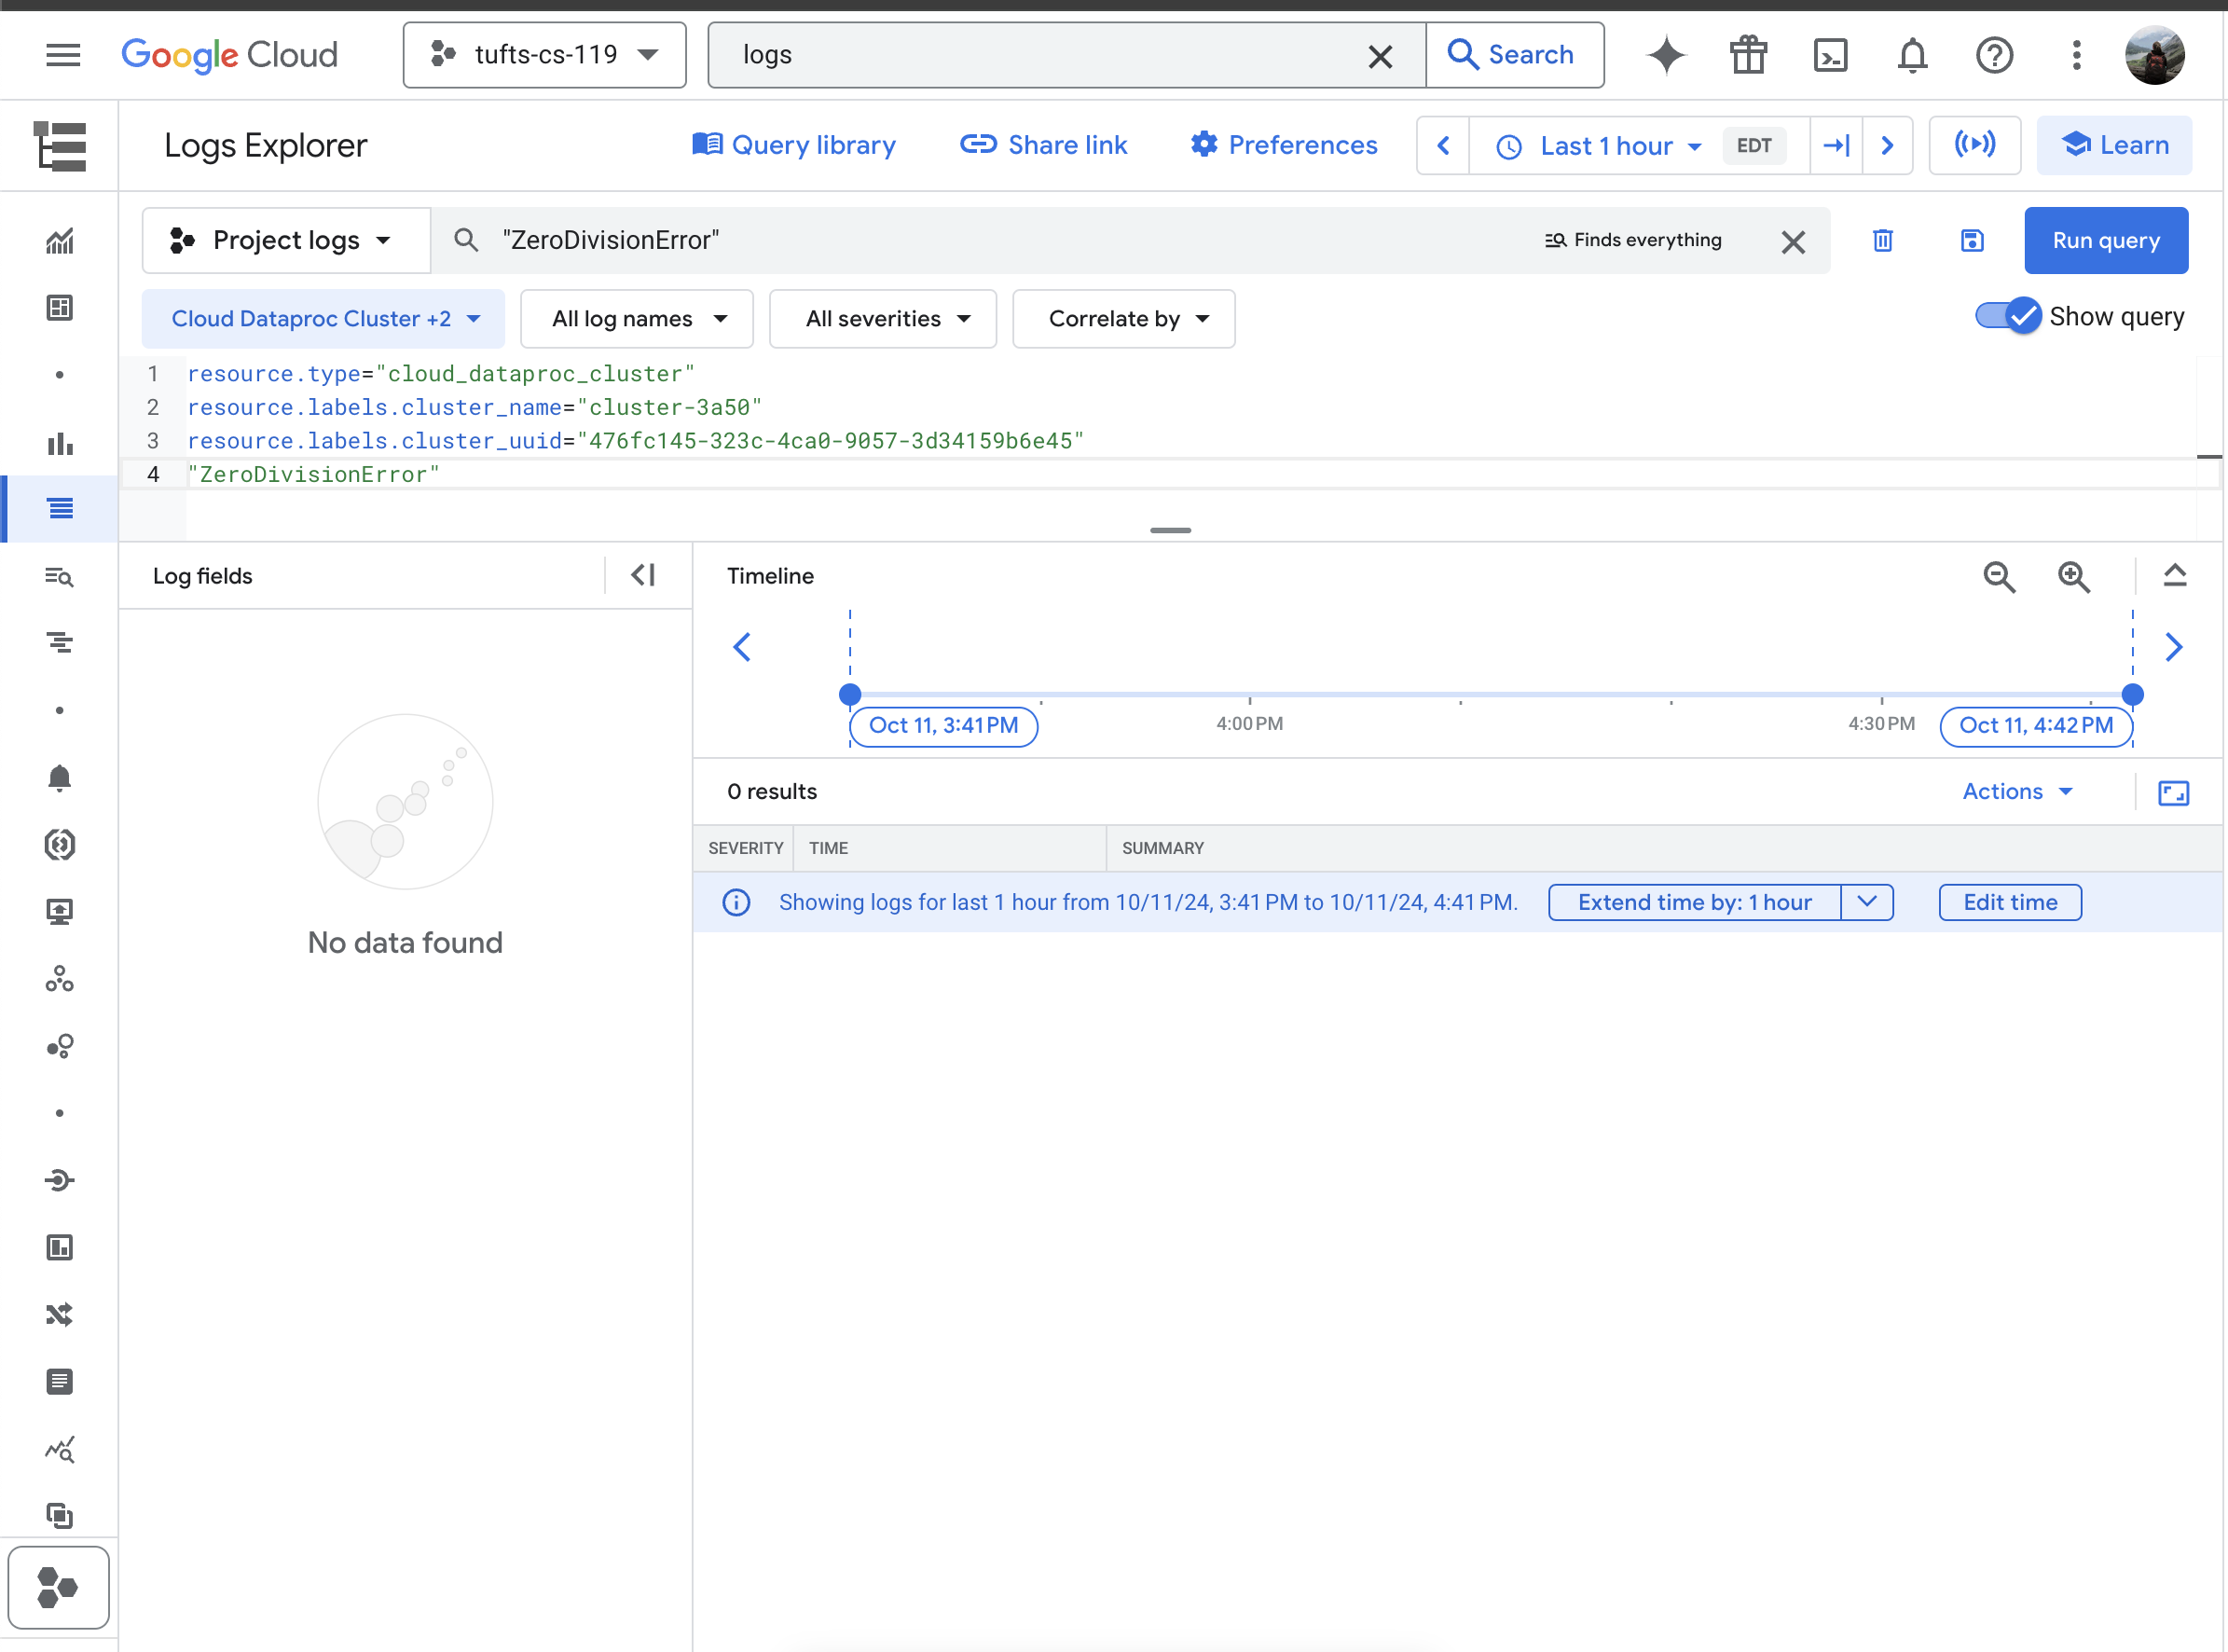

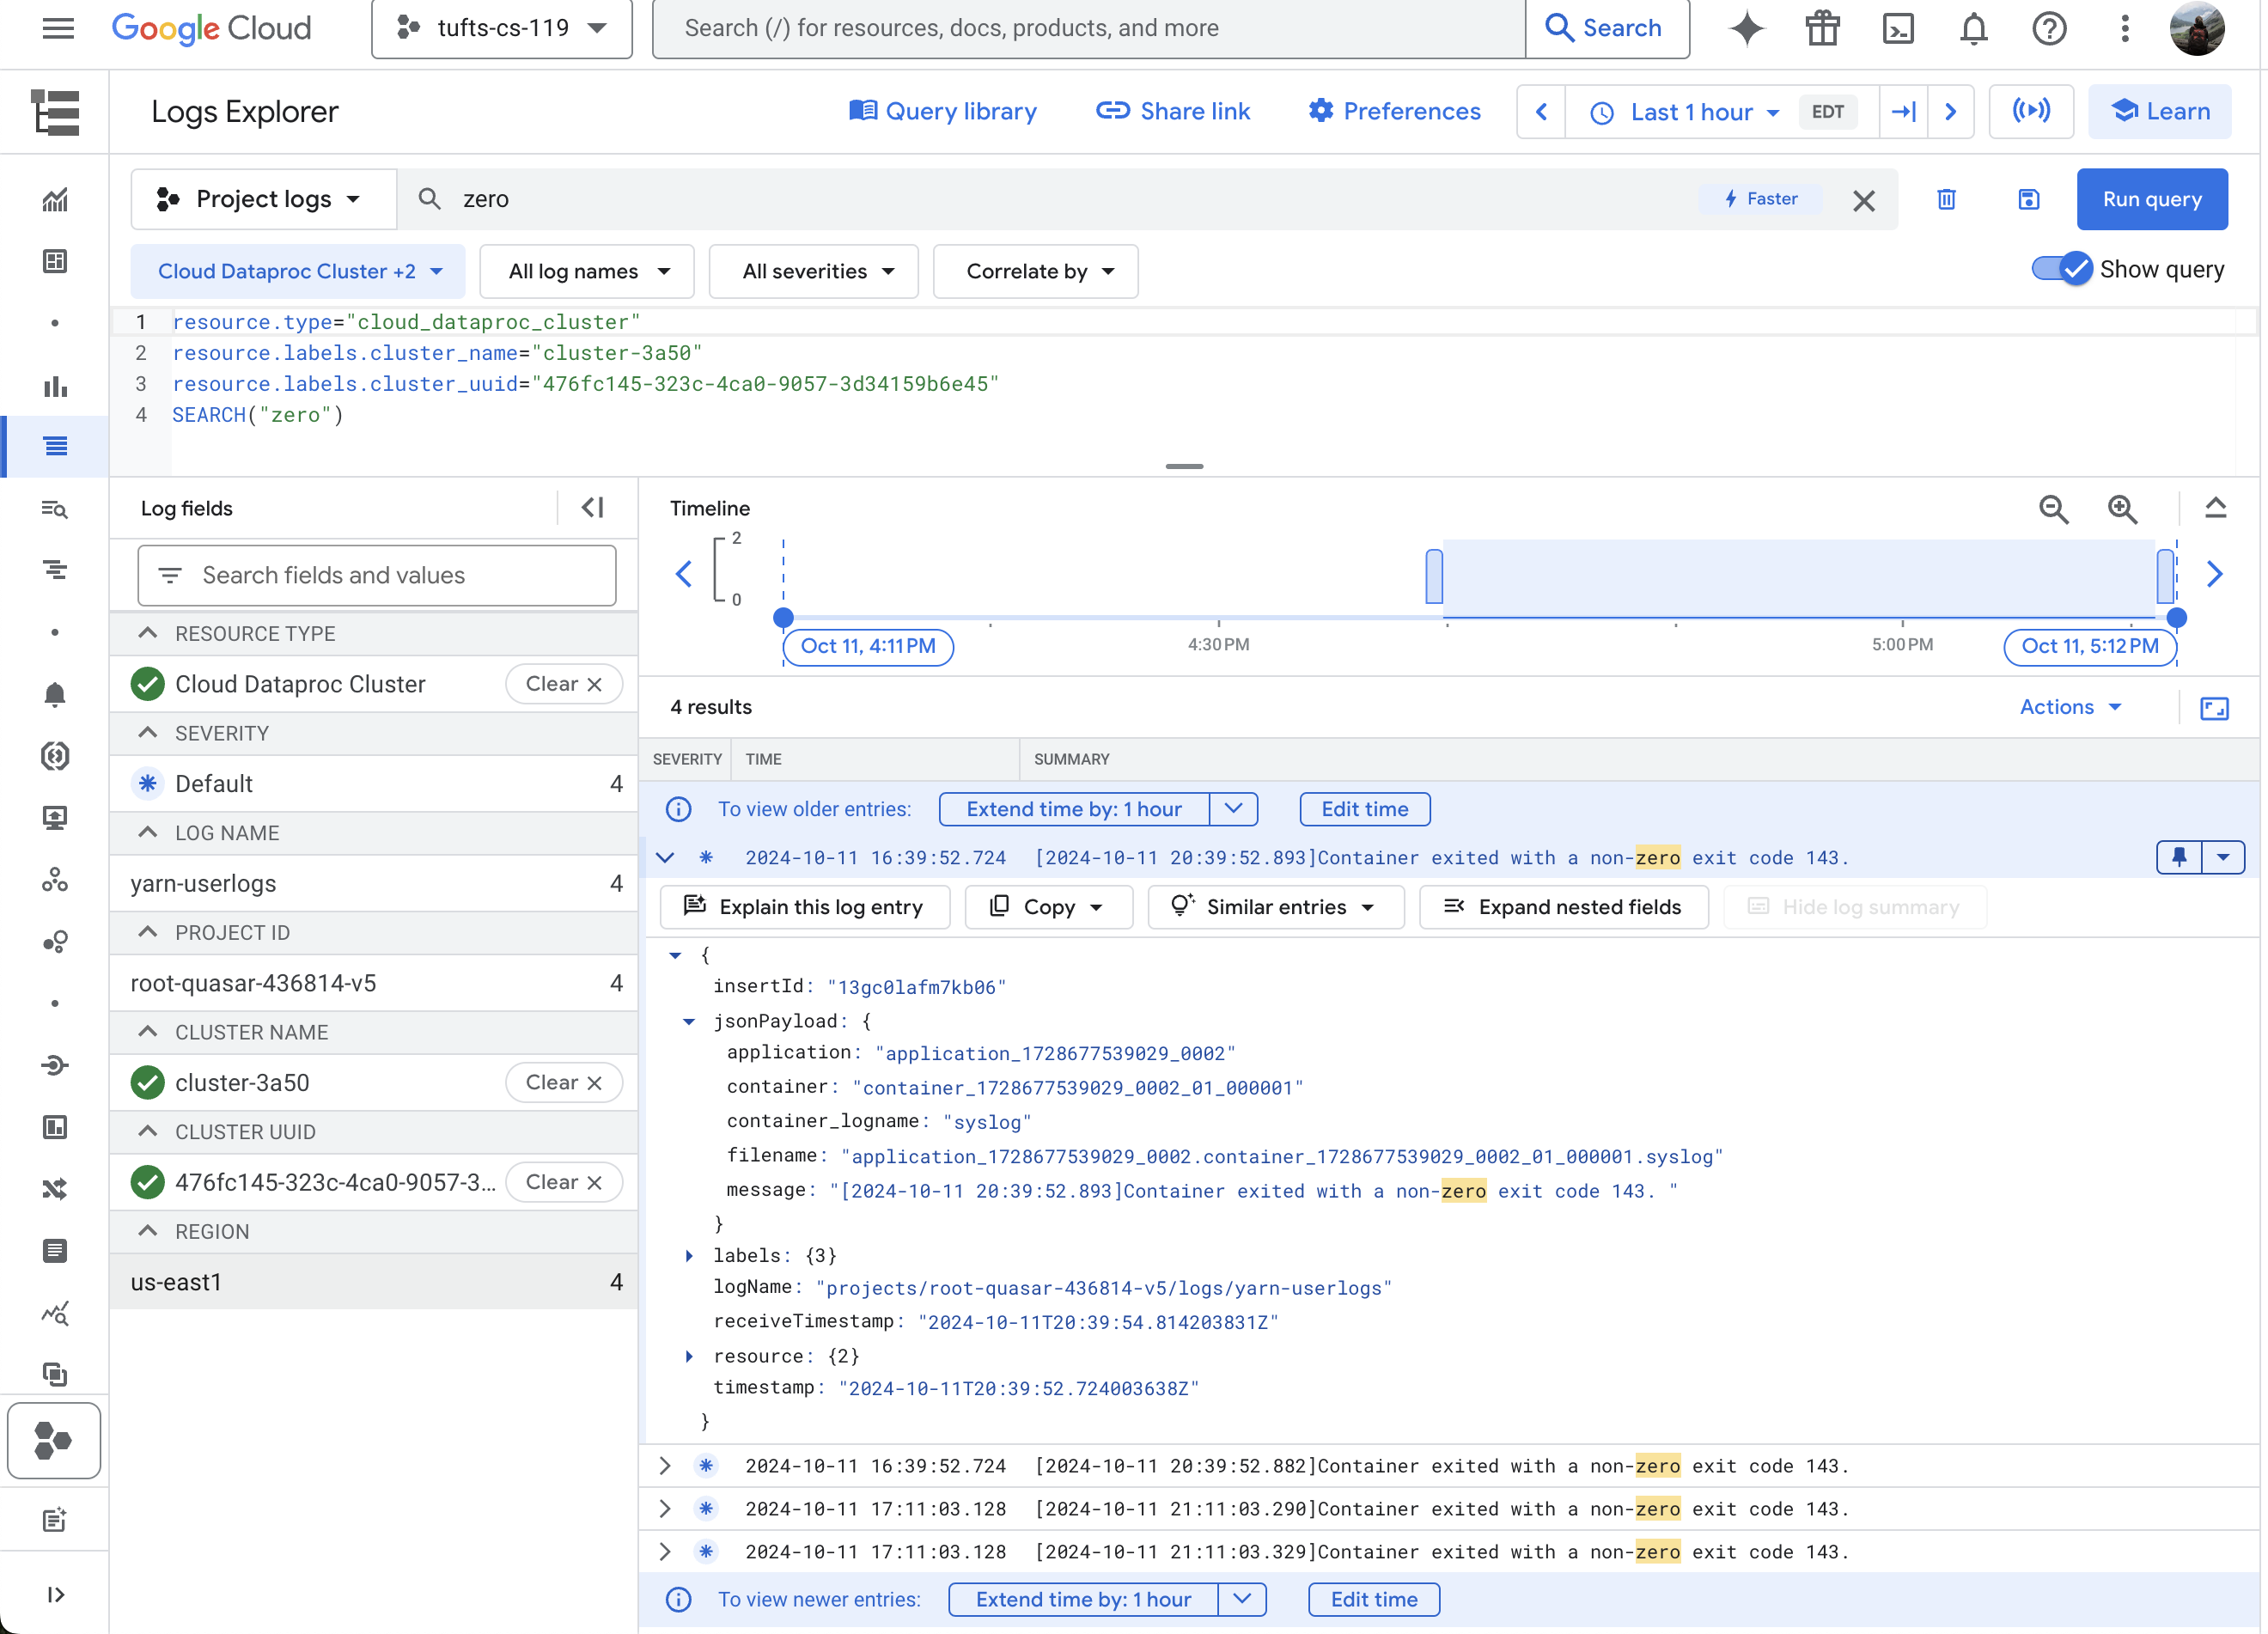

The workaround I will use, following consultation with Susie and Joseph, will be to run the modified mapper_noll with the divide by zero case, in addition to running the original mapper_noll, and determine the difference in error messages between the two. That output follows:

I count 10 errors from the modified mapper that includes the divide by zero case. Since the mapper_noll resulted in 0 errors, there are 10 additional errors that can be expected when a mapper divides by zero in this case.